In [1]:

from cycler import cycler
import matplotlib.pyplot as plt

from model_params_functions import *
from figure_params import *


fontsize = 26
fontsize_ticks = 14


plt.rcParams.update({
    'font.family':         "sans-serif",
    'font.size':           fontsize,
    'xtick.labelsize':     fontsize_ticks,
    'ytick.labelsize':     fontsize_ticks,
    'savefig.format':      'png',
    "mathtext.fontset":    "stixsans",
    })

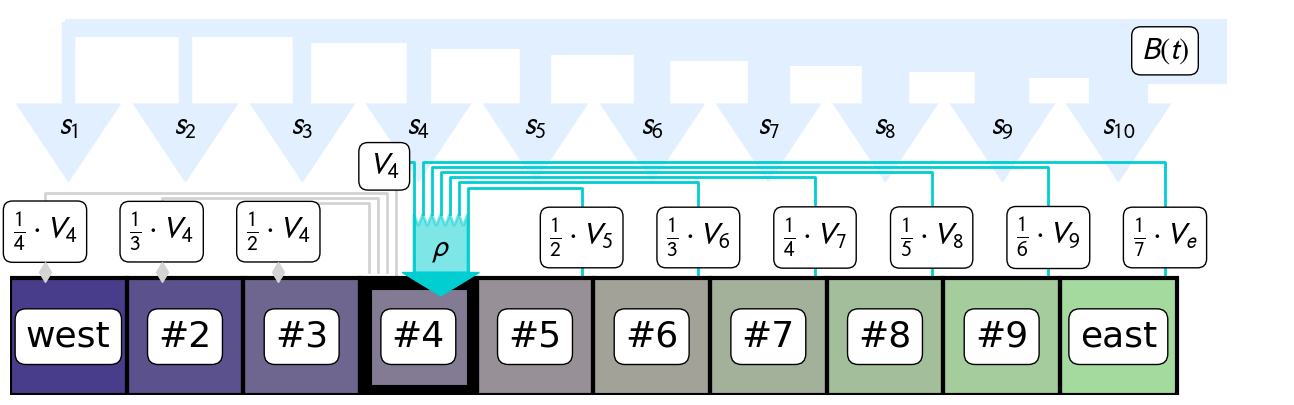

In [3]:
icell = 3

# fig, axes = plt.subplots(1, 1, figsize = (ncells+3, 3))
fig, axes = plt.subplots(1, 1, figsize = (ncells*2, 5))
fig.set_facecolor("white")
bbox_fontsize = plt.rcParams["font.size"]#22
bbox_fontsize_s = bbox_fontsize -4
ax = axes


ax.set_ylim(.5,-2.8)
# ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.set_axis_off()

x = local_sensitivity + .05
plt.imshow([np.linspace(0,1,ncells)], cmap=cmap)


# cell borders
def cell_border(x,y, ax=None, **kwargs):
    rect = plt.Rectangle((x-.5, y-.5), 1,1, fill=False, **kwargs)
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect


# cell borders
def highlight_cell(x,y, ax=None, **kwargs):
    rect = plt.Rectangle((x-.45, y-.45), .91, .91, fill=False, **kwargs)
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect


# xaxis showing distance to cell #icell
dists = np.abs(np.arange(ncells) - icell)
ax.xaxis.set_ticks(np.linspace(0,ncells-1,ncells))
ax.xaxis.set_ticklabels(dists)
ax.set_xlabel("Distance to cell #%i"%(icell+1))

# set cell labels
props = dict(boxstyle='round', facecolor='white')
for (j,i),label in np.ndenumerate([local_sensitivity]):
    if i == 0: label = "west"
    elif i == ncells-1: label = "east"
    else: label = "#%i"%(label*10)
    ax.text(i,j,label,ha='center',va='center', fontsize=bbox_fontsize,bbox=props)

# y axis
ax.set_yticks([])


for i in range(ncells):
    cell_border(i,0, color="black", linewidth=3, zorder=10)



#################################################################
# EXEMPLARY FOR CELL #4
# hightlight cell #icell
highlight_cell(icell,0, color="black", linewidth=8, zorder=10)


#################################################################

# BACKGROUND PRECIPITATION B(t)

# ingoing default precipitation
ytop = -2.7#2.4
ybottom = -2.#2.1
xleft = ax.get_xlim()[-1] + .4
lw_precip_background =5# 35

color_precip_background = "#E1EFFF"
for j in range(ncells):
    width = .05 +(j/20.)
    if (j+1)*.1 < minSensitivity: width = .05 +(1/20.)
    ax.fill([xleft, xleft, j, j],[ytop + width, ytop, ytop, ytop + width], color=color_precip_background, lw=lw_precip_background, zorder=0)
    ax.fill([j-width/2., j-width/2., j+width/2., j+width/2.],[ytop, ybottom, ybottom, ytop], color=color_precip_background, zorder=0)
    ax.plot(j, ybottom, marker=11, color=color_precip_background, markersize=lw_precip_background*1.5*ncells, zorder=0)
    # ax.text(j, ybottom+.2, "%3.1f"%local_sensitivity[j], ha='center',va='center', fontsize=bbox_fontsize_s)
    ax.text(j, ybottom+.2, r'$s_{0}$'.format({j+1}), ha='center',va='center', fontsize=bbox_fontsize_s)

ax.text(xleft-.5,ytop+width/2., "$B(t)$", ha='center',va='center', fontsize=bbox_fontsize_s, bbox=props) 



#################################################################
# MOISTURE RECYCLING - INCOMING
# moisture recycling arrows
color_precip_recyc_out = "lightgrey"#"lightsteelblue"
color_precip_recyc_in  = "darkturquoise"
lw_precip_recyc_arrow_marker = 10
lw_precip_recyc_arrow_line   =  2
xaxleft = ax.get_xlim()[0]
xcenter = np.mean(ax.get_xlim())

xileft  = icell + xaxleft
xiright = icell + xaxleft + 1

xi = np.linspace(xileft, xiright, ncells+4)[1:-1]
xi_self = xi[icell:icell+3]
xi = np.concatenate((xi[:icell], xi[icell+2:]))
ys = np.linspace(-1.1, -1.5, ncells)
ybottom = -.5
ybottom_ingoing = ybottom - .55

# ingoing moisture recycling
props = dict(boxstyle='round', facecolor='white')    
for j in range(icell+1, ncells):
    xleft = xi[ncells-j+icell]
    ytop  = ys[j]
    xright= xaxleft + j + .9

    x = [xleft, xleft, xright, xright]
    y = [ybottom_ingoing, ytop, ytop, ybottom]
    if j == icell+1: y = [ybottom, ytop, ytop, ybottom] # right-most until bottom
    ax.plot(x,y,  color_precip_recyc_in, lw = lw_precip_recyc_arrow_line, zorder=1)

    # text on the arrows
    if j == ncells-1:
        ax.text(xright, ybottom-.35, r'$\frac{1}{0} \cdot V_e$'.format({j-icell+1}, {1}),
            ha='center',va='center', fontsize=bbox_fontsize_s, bbox=props)
    else:
        cell_label = j+1
        ax.text(xright, ybottom-.35, r'$\frac{2}{0} \cdot V_{1}$'.format({j-icell+1}, {cell_label}, {1}),
            ha='center',va='center', fontsize=bbox_fontsize_s, bbox=props)


# moisture recycling from icell itself
xleft   = xi_self[0]
xmiddle = xi_self[1]
xright  = xi_self[2]
ytop  = ys[9]

x_self_out = [xleft, xleft, xmiddle]
y_self_out = [ybottom, ytop, ytop]
x_self_in  = [xmiddle, xright, xright]
y_self_in  = [ytop, ytop, ybottom]

ax.plot(x_self_out, y_self_out,  color_precip_recyc_out, lw = lw_precip_recyc_arrow_line)
ax.plot(x_self_in,  y_self_in,   color_precip_recyc_in,  lw = lw_precip_recyc_arrow_line)
ax.text(xleft-.1, ytop+.04, r'$V_{0}$'.format(icell+1), ha='center',va='center', fontsize=bbox_fontsize_s, bbox=props, zorder=20)


# summing arrow for incoming recycled moisture
x_in_center = (xi_self[2] + xi[-1])/2
x_in_left   = xi_self[2]-.1
x_in_right  = xi[-1] + .1
y_in_top    = ybottom - .05
y_in_bottom = ybottom + .15
x_in = [x_in_left, x_in_right, x_in_center, x_in_left]
y_in = [y_in_top, y_in_top, y_in_bottom, y_in_top]
ax.fill(x_in,y_in, color=color_precip_recyc_in, lw=1, zorder=11)

# fill also area above
ybottom = y_in_top
xleft = xi_self[2]

# alpha from middle
ytop = ybottom_ingoing + .1
n_in = ncells-icell
x_interp = np.arange(n_in*2-1)
x_in = np.concatenate([[xleft], np.interp(x_interp, x_interp[0::2], xi[icell:]), [xi[-1],xleft]])
y_in = np.concatenate([[ybottom], [ytop-.1, ytop] * (n_in-1), [ytop-.1, ybottom, ybottom]])
ax.fill(x_in,y_in, color=color_precip_recyc_in, lw=lw_precip_recyc_arrow_line, alpha = .5)


# times 600 on the arrows
xmiddle = icell
xmiddle = np.mean(xi[icell:])
ax.text(xmiddle, ybottom-.2,
    # r'$\cdot{0}$'.format(interactionScale),
    # r'${0}$'.format(interactionScale),
    r'$\rho$',
    ha='center',va='center', fontsize=bbox_fontsize_s, #bbox=props
    )




#################################################################
# MOISTURE RECYCLING - OUTGOING
# outgoing moisture recycling
for j in range(0, icell):
    xright = xi[icell-j-1]
    ytop  = ys[icell-j]
    xleft = xaxleft + j + icell/ncells

    x = [xleft, xleft, xright, xright]
    y = [ybottom, ytop, ytop, ybottom]
    ax.plot(x,y,  color_precip_recyc_out, lw = lw_precip_recyc_arrow_line)
    ax.plot(xleft, ybottom, 'd', color=color_precip_recyc_out, markersize=lw_precip_recyc_arrow_marker, zorder=11)

    # text on the arrows
    cell_label = "e" if j == ncells-1 else str(j+1)
    ax.text(xleft, ybottom-.35, r'$\frac{2}{0} \cdot V_{1}$'.format({icell-j+1}, {icell+1}, {1}),
        ha='center',va='center', fontsize=bbox_fontsize_s, bbox=props)



#################################################################
fig.savefig("../figs/fig02.png", bbox_inches='tight')
